## Machine Learning TP1 : Reconnaissance de Champignon

### Import des librairies

In [1]:
import pandas as pd
import numpy as np
import os
from IPython.display import Image, display

from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import ensemble
from sklearn.tree import export_graphviz
# pd.set_option('display.max_rows', None) # Afficher toutes les lignes des dataframes
# pd.set_option('display.max_columns', None) # Afficher toutes les lignes des dataframes

from google.colab import files
data_to_load = files.upload()

Saving champignons.csv to champignons.csv


### 1. Preparation des données

1.1 importer et afficher les données dans un DataFrame.

Afficher le nombre de champignons toxiques ou non.

Vérifier qu'il n'y as pas de valeurs nulles

In [2]:
my_dataframe = pd.read_csv('champignons.csv', dtype={'id_Champignons': int})
my_dataframe

,toxicite,surface-chapeau,ecchymoses,attache-lamelles,taille-lamelles,forme-pied,surface-pied-sur-anneau,couleur-pied-sur-anneau,couleur-voile,type-anneau,population
0,toxique,lisse,oui,libre,étroit,élargissant,lisse,blanc,blanc,pendant,dispersée
1,comestible,lisse,oui,libre,large,élargissant,lisse,blanc,blanc,pendant,nombreuse
2,comestible,lisse,oui,libre,large,élargissant,lisse,blanc,blanc,pendant,nombreuse
3,toxique,écaillée,oui,libre,étroit,élargissant,lisse,blanc,blanc,pendant,dispersée
4,comestible,lisse,non,libre,large,effilé,lisse,blanc,blanc,évasé,abondante
...,...,...,...,...,...,...,...,...,...,...,...
8119,comestible,lisse,non,adhérent,large,élargissant,lisse,orange,orange,pendant,clairsemée
8120,comestible,lisse,non,adhérent,large,élargissant,lisse,orange,brun,pendant,variée
8121,comestible,lisse,non,adhérent,large,élargissant,lisse,orange,orange,pendant,clairsemée
8122,toxique,écaillée,non,libre,étroit,effilé,lisse,blanc,blanc,évasé,variée


In [3]:
# Vérification des valeurs nulles
len(my_dataframe) - len(my_dataframe.dropna())

0

1.2 Encoder les données avec une colonne 1/0 par valeur possible.Eviter de générer une matrice "sparse"\
Afficher la taille des données (lignes x colonnes) et les noms de colonnes générées.\
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder

In [4]:
encoder = preprocessing.OneHotEncoder(sparse_output=False, dtype=int)
encoder.fit(my_dataframe)
columns_encode = encoder.get_feature_names_out()
valeurs_encode = encoder.transform(my_dataframe)
valeurs_encode.shape, columns_encode

((8124, 42),
 array(['toxicite_comestible', 'toxicite_toxique',
        'surface-chapeau_fibreuse', 'surface-chapeau_lisse',
        'surface-chapeau_rainurée', 'surface-chapeau_écaillée',
        'ecchymoses_non', 'ecchymoses_oui', 'attache-lamelles_adhérent',
        'attache-lamelles_libre', 'taille-lamelles_large',
        'taille-lamelles_étroit', 'forme-pied_effilé',
        'forme-pied_élargissant', 'surface-pied-sur-anneau_fibreuse',
        'surface-pied-sur-anneau_lisse', 'surface-pied-sur-anneau_soyeuse',
        'surface-pied-sur-anneau_écaillée',
        'couleur-pied-sur-anneau_beige', 'couleur-pied-sur-anneau_blanc',
        'couleur-pied-sur-anneau_brun', 'couleur-pied-sur-anneau_cannelle',
        'couleur-pied-sur-anneau_gris', 'couleur-pied-sur-anneau_jaune',
        'couleur-pied-sur-anneau_orange', 'couleur-pied-sur-anneau_rose',
        'couleur-pied-sur-anneau_rouge', 'couleur-voile_blanc',
        'couleur-voile_brun', 'couleur-voile_jaune',
        'couleur-voi

1.3 Créer un nouveau DataFrame avec les données et les noms de colonne (méthode get_feature_names_out() de OneHotEncoder). Mélanger les données. Afficher le résultat.

In [5]:
df = pd.DataFrame(valeurs_encode, columns=columns_encode)
df

,toxicite_comestible,toxicite_toxique,surface-chapeau_fibreuse,surface-chapeau_lisse,surface-chapeau_rainurée,surface-chapeau_écaillée,ecchymoses_non,ecchymoses_oui,attache-lamelles_adhérent,attache-lamelles_libre,...,type-anneau_fibreux,type-anneau_large,type-anneau_pendant,type-anneau_évasé,population_abondante,population_clairsemée,population_dispersée,population_nombreuse,population_solitaire,population_variée
0,0,1,0,1,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
1,1,0,0,1,0,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
3,0,1,0,0,0,1,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
4,1,0,0,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,1,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0
8120,1,0,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
8121,1,0,0,1,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0
8122,0,1,0,0,0,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1


1.4 Creer 4 jeux de données : train features et labels (70%) et dev features et labels (30%).\
Utiliser toxicite_toxique comme label. Ne pas garder de label (toxicite_toxique et toxicite_comestible) dans les features !

In [9]:
features = df.drop(columns=['toxicite_comestible', 'toxicite_toxique'])
labels = df['toxicite_toxique']

# 70%/30%
X_train, X_dev, y_train, y_dev = train_test_split(
    features, labels, test_size=0.3, random_state=42, stratify=labels
)

features, labels

(      surface-chapeau_fibreuse  surface-chapeau_lisse  \
 0                            0                      1   
 1                            0                      1   
 2                            0                      1   
 3                            0                      0   
 4                            0                      1   
 ...                        ...                    ...   
 8119                         0                      1   
 8120                         0                      1   
 8121                         0                      1   
 8122                         0                      0   
 8123                         0                      1   
 
       surface-chapeau_rainurée  surface-chapeau_écaillée  ecchymoses_non  \
 0                            0                         0               0   
 1                            0                         0               0   
 2                            0                         0              

## 2. Arbre de décision

2.1 Entrainer un arbre de décision sur les données d'apprentissage. Afficher l'arbre obtenu en utilisant plot_tree.

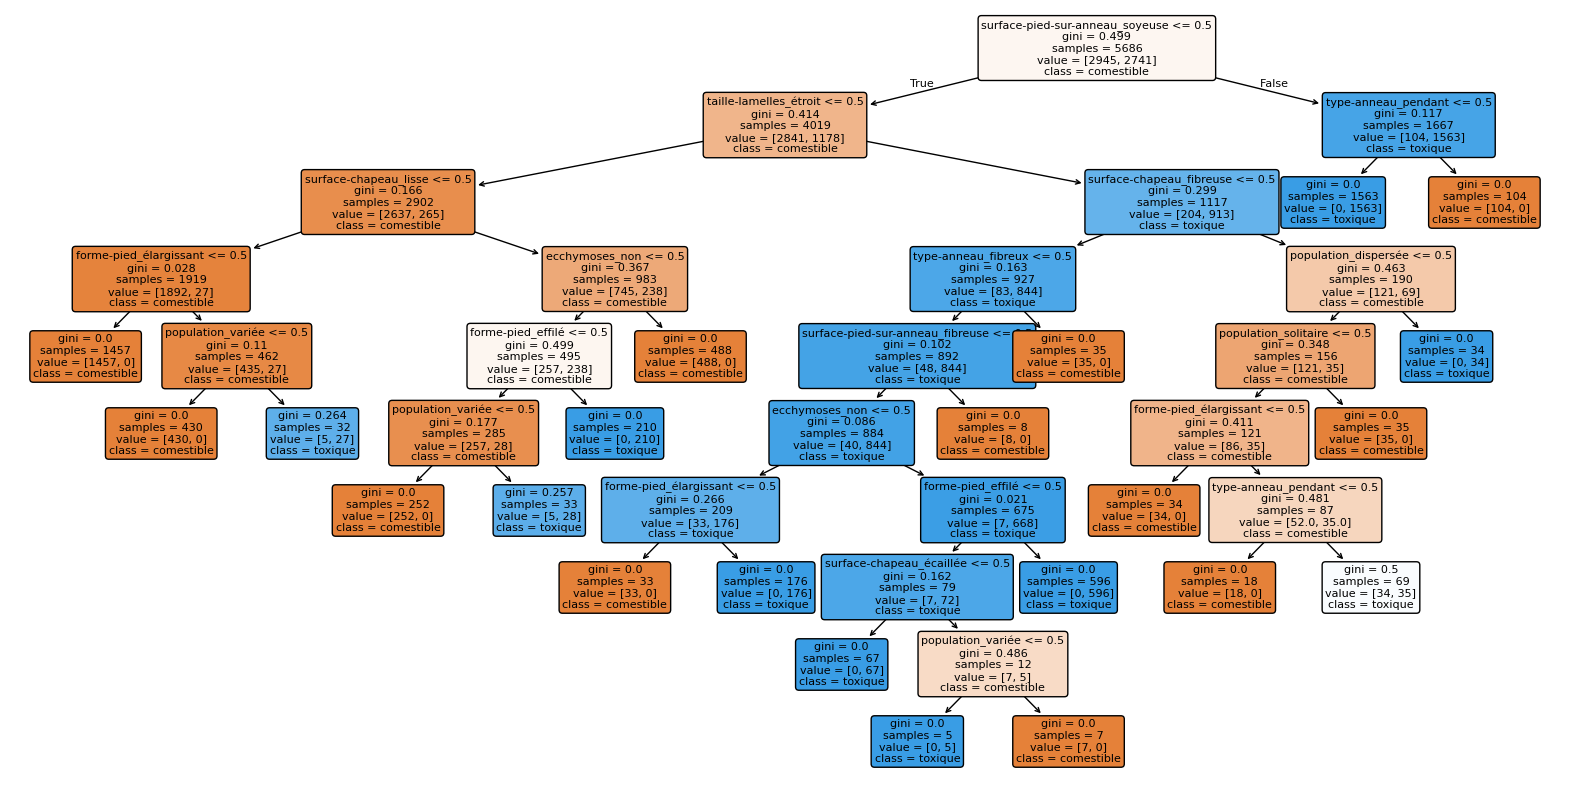

In [11]:
#import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(
    clf,
    feature_names=features.columns,
    class_names=["comestible", "toxique"],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.show()

2.2 Afficher l'arbre obtenu en utilisant graphwiz

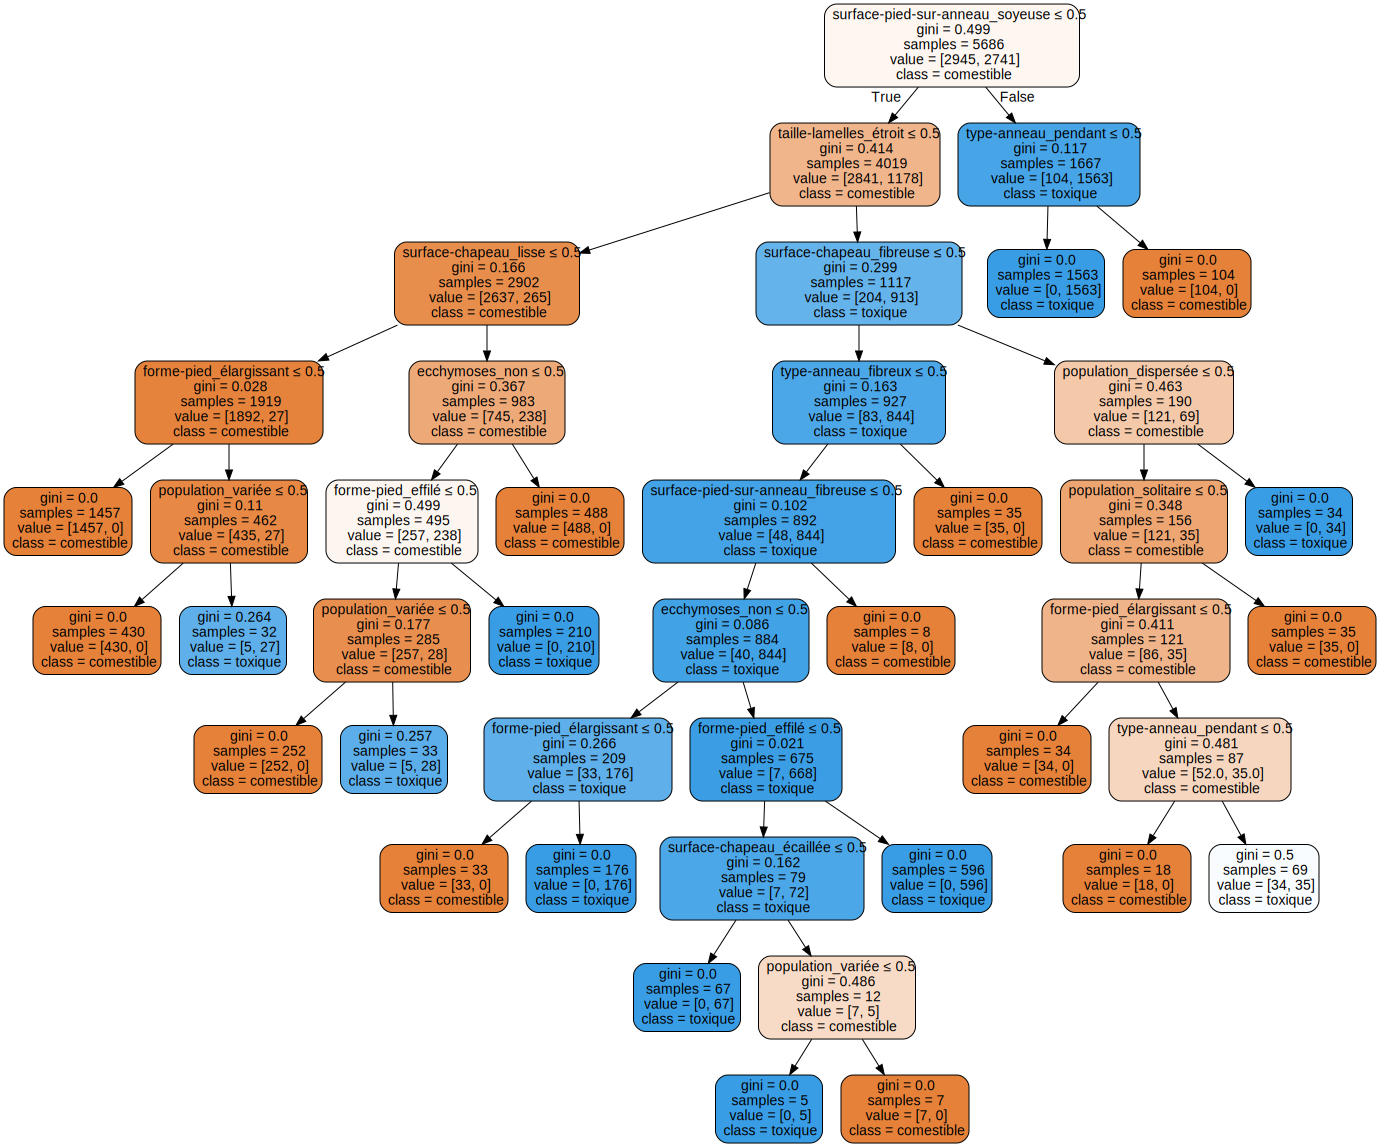

In [12]:
from sklearn.tree import export_graphviz
import graphviz

# Exporter l'arbre au format DOT
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=features.columns,
    class_names=["comestible", "toxique"],
    filled=True,
    rounded=True,
    special_characters=True
)

# Afficher avec Graphviz
graph = graphviz.Source(dot_data)
graph.render("arbre_champignons")   # génère un fichier arbre_champignons.pdf
graph

2.3 Mesurer la précision du modèle sur les données de dev

In [16]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_dev)

accuracy = accuracy_score(y_dev, y_pred)
str(accuracy*100)+"%"

'99.17965545529123%'

## 3. Modèle de forêt

3.1 Réalisez un algorithme de Random Forest sur les données. Utiliser 500 arbres et une profondeur de 6.

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Créer le modèle Random Forest
rf_clf = RandomForestClassifier(
    n_estimators=500, max_depth=6, random_state=42
)

# 2. Entraîner sur les données d'apprentissage
rf_clf.fit(X_train, y_train)

# 3. Prédire sur les données de dev
y_pred_rf = rf_clf.predict(X_dev)

# 4. Mesurer la précision
accuracy_p = accuracy_score(y_dev, y_pred_rf)
print(f"Random Forest (500 arbres, profondeur=6) : {accuracy_p*100:.2f}%")

Random Forest (500 arbres, profondeur=6) : 97.70%


3.2 Afficher trois arbres au hasard.

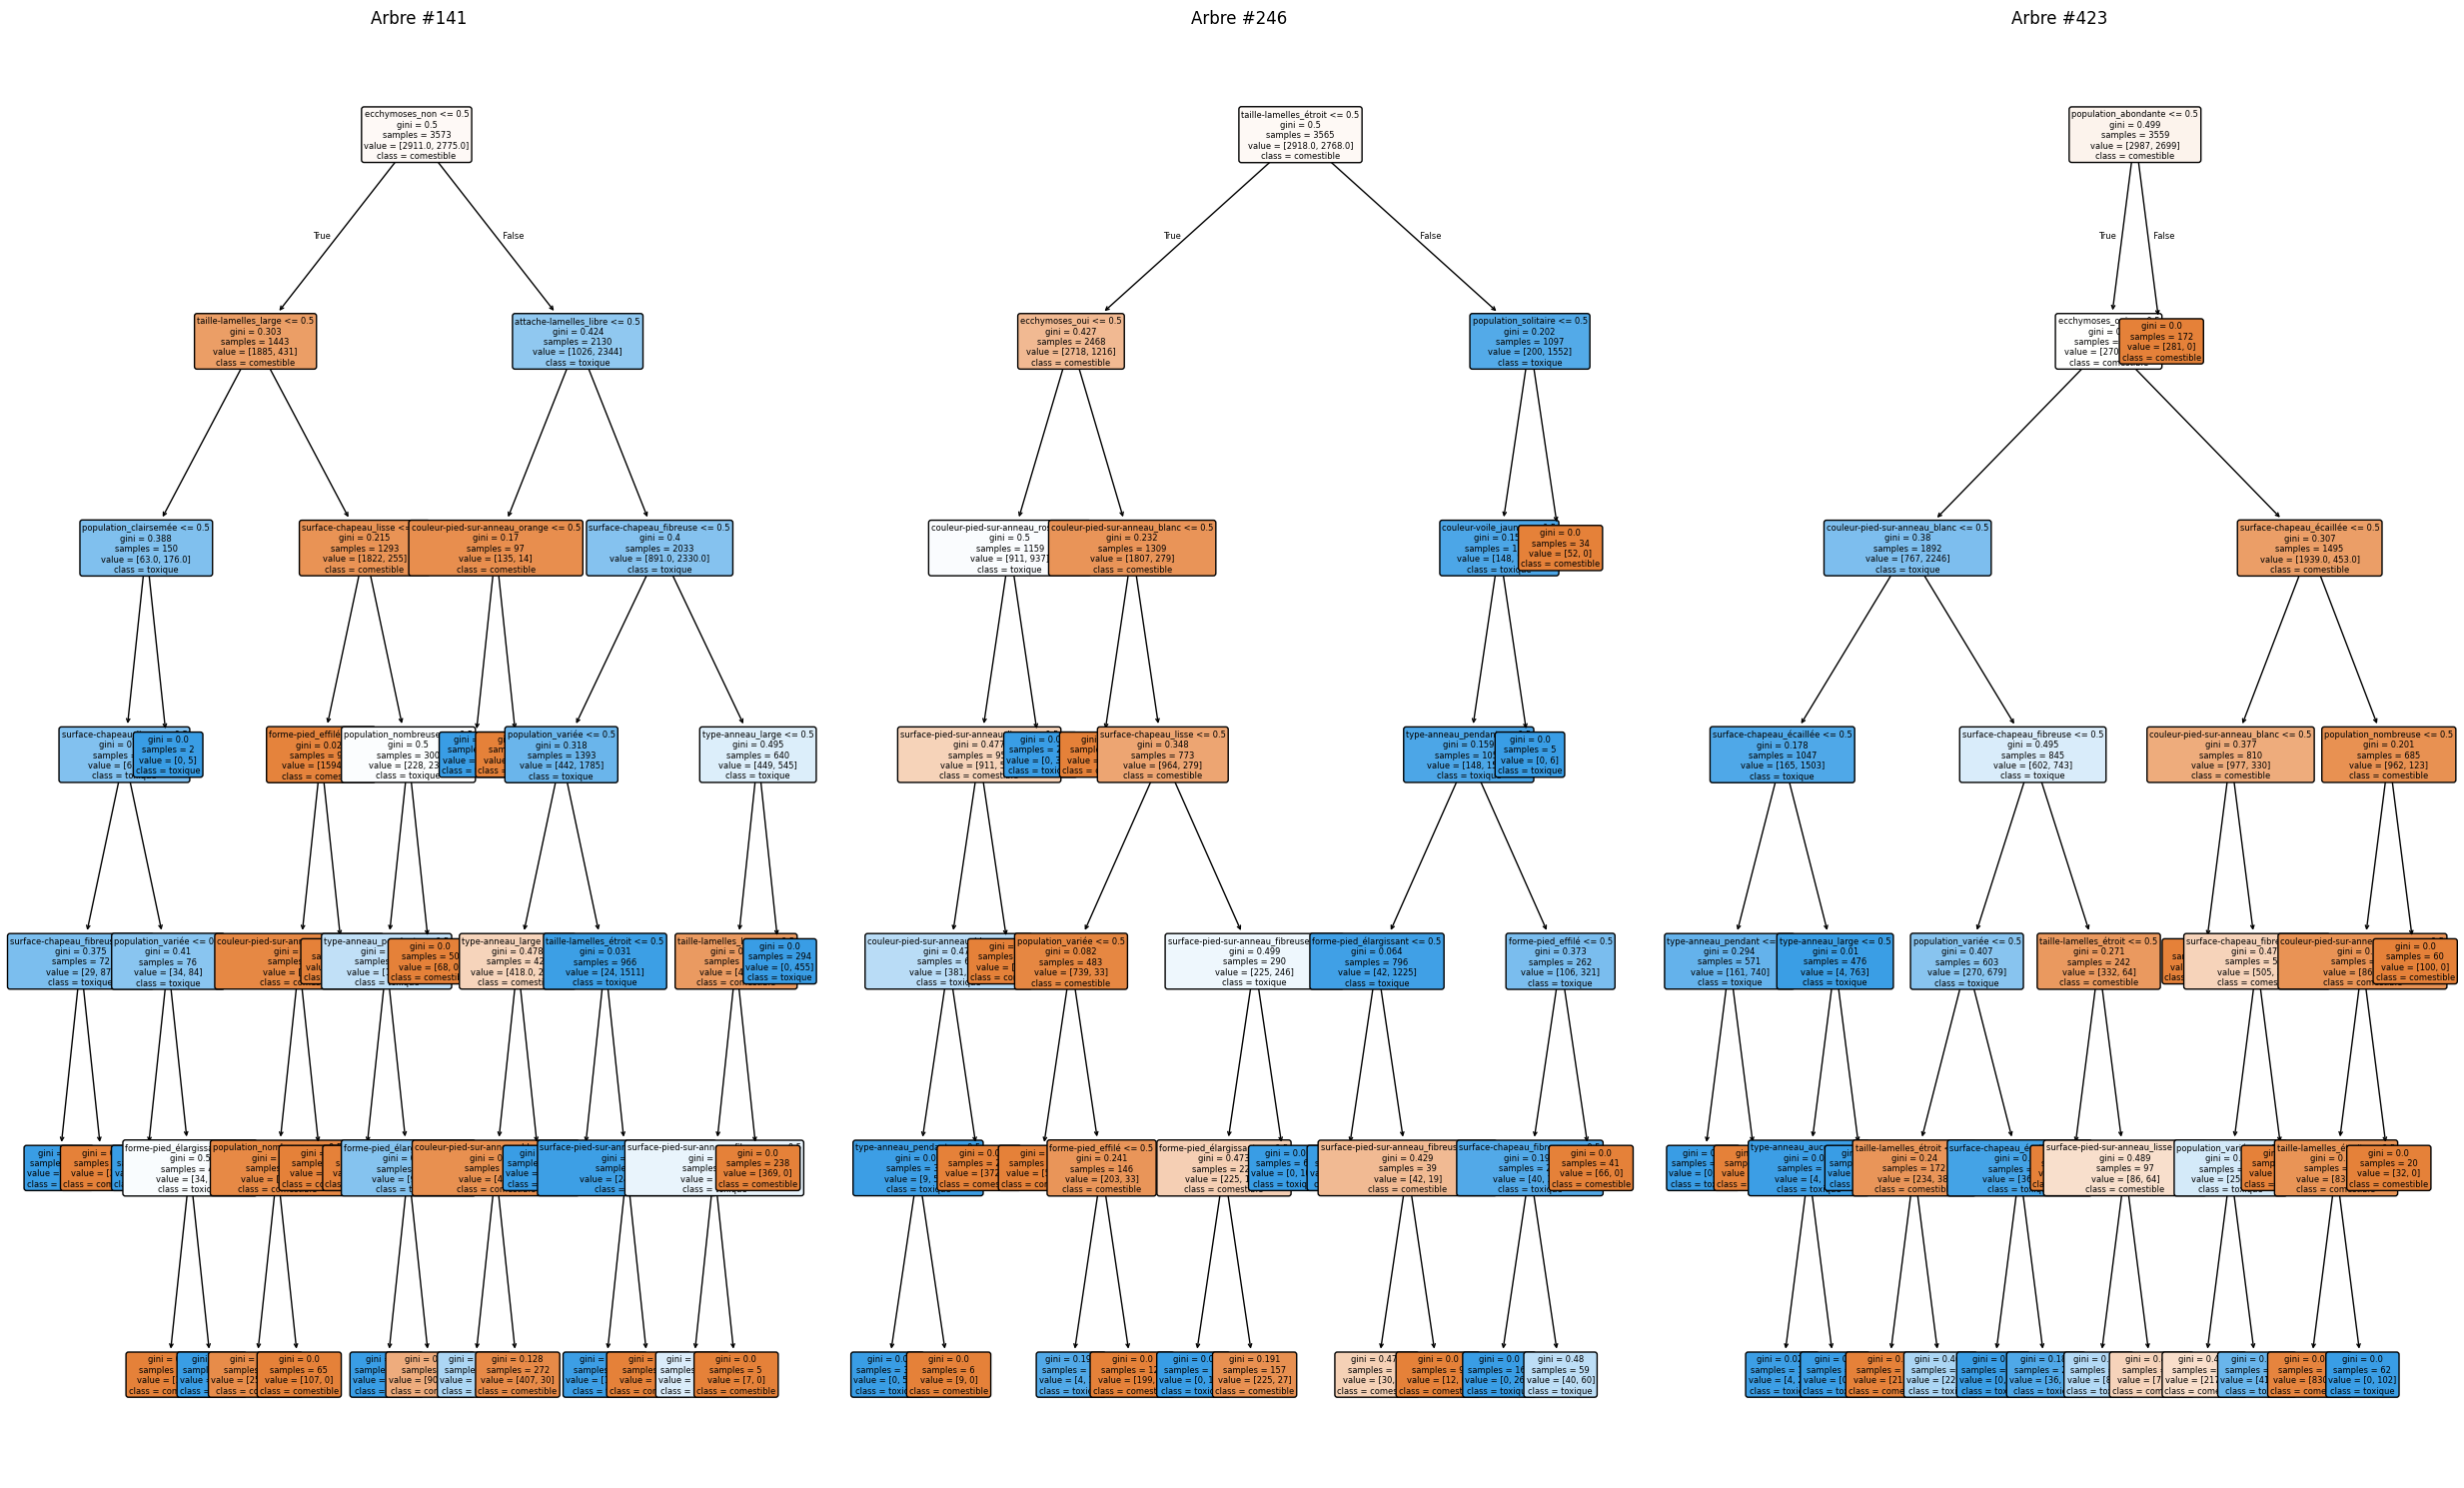

In [20]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from random import randint

plt.figure(figsize=(25, 15))

for i in range(3):
    idx = randint(0, len(rf_clf.estimators_) - 1)
    plt.subplot(1, 3, i+1)
    plot_tree(
        rf_clf.estimators_[idx],
        feature_names=features.columns,
        class_names=["comestible", "toxique"],
        filled=True,
        rounded=True,
        fontsize=6
    )
    plt.title(f"Arbre #{idx}")

plt.tight_layout()
plt.show()


3.3 Mesurer la précision du modèle Random Forest sur les données de dev

In [22]:
from sklearn.metrics import accuracy_score

# Prédictions sur le jeu de dev
y_pred_rf = rf_clf.predict(X_dev)

# Calcul de la précision
accuracy_rf = accuracy_score(y_dev, y_pred_rf)

print(f"Précision Random Forest sur le jeu de dev: {accuracy_rf*100:.2f}%")

Précision Random Forest sur le jeu de dev: 97.70%


## 4. optimisation des paramètres

4.1 En utilisant GridSearchCV, chercher la meilleure combinaison max_depth et n_estimator.

Afficher les paramètre du modèle et a précision obtenue.

Réexécuter un apprentissage avec la meilleure combinaison.


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Définir la grille de paramètres à tester
param_grid = {
    "n_estimators": [100, 200, 500],
    "max_depth": [4, 6, 8, None]  # None = pas de limite
}

# 2. Créer le modèle de base
rf = RandomForestClassifier(random_state=42)

# 3. Lancer la recherche par validation croisée
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,             # validation croisée à 5 plis
    n_jobs=-1,        # paralléliser
    scoring="accuracy"
)

grid_search.fit(X_train, y_train)

# 4. Meilleurs paramètres et meilleure précision obtenue
print("Meilleurs paramètres trouvés :", grid_search.best_params_)
print(f"Meilleure précision moyenne (CV) : {grid_search.best_score_*100:.2f}%")

# 5. Réentraîner un modèle avec les meilleurs paramètres
best_rf = RandomForestClassifier(
    n_estimators=grid_search.best_params_["n_estimators"],
    max_depth=grid_search.best_params_["max_depth"],
    random_state=42
)

best_rf.fit(X_train, y_train)

# 6. Évaluer sur les données de dev
y_pred_best = best_rf.predict(X_dev)
accuracy_best = accuracy_score(y_dev, y_pred_best)
print(f"Précision finale sur le jeu de dev : {accuracy_best*100:.2f}%")


Meilleurs paramètres trouvés : {'max_depth': None, 'n_estimators': 500}
Meilleure précision moyenne (CV) : 99.16%
Précision finale sur le jeu de dev : 99.18%


4.2 Afficher les paramètres optimaux et la précisions obtenue sur les données dev

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Définir la grille de paramètres
param_grid = {
    "n_estimators": [100, 200, 500],
    "max_depth": [4, 6, 8, None]
}

# 2. Modèle de base
rf = RandomForestClassifier(random_state=42)

# 3. Recherche par validation croisée
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring="accuracy"
)

grid_search.fit(X_train, y_train)

# 4. Afficher les meilleurs paramètres
print("Paramètres optimaux :", grid_search.best_params_)

# 5. Réentraîner avec ces paramètres optimaux
best_rf = RandomForestClassifier(
    n_estimators=grid_search.best_params_["n_estimators"],
    max_depth=grid_search.best_params_["max_depth"],
    random_state=42
)
best_rf.fit(X_train, y_train)

# 6. Précision sur les données de dev
y_pred_best = best_rf.predict(X_dev)
accuracy_best = accuracy_score(y_dev, y_pred_best)

print(f"Précision obtenue sur le jeu de dev : {accuracy_best*100:.2f}%")


Paramètres optimaux : {'max_depth': None, 'n_estimators': 500}
Précision obtenue sur le jeu de dev : 99.18%


4.3 Classer et Afficher les caractéristiques d'importance supérieure à 1%

Caractéristiques avec importance > 1% :
                             Feature  Importance
9             taille-lamelles_étroit    0.113894
14   surface-pied-sur-anneau_soyeuse    0.098901
8              taille-lamelles_large    0.095874
32               type-anneau_pendant    0.081170
39                 population_variée    0.069092
31                 type-anneau_large    0.057167
13     surface-pied-sur-anneau_lisse    0.055637
4                     ecchymoses_non    0.043023
11            forme-pied_élargissant    0.040496
10                 forme-pied_effilé    0.040180
5                     ecchymoses_oui    0.039247
1              surface-chapeau_lisse    0.034189
17     couleur-pied-sur-anneau_blanc    0.032776
33                 type-anneau_évasé    0.027300
36              population_dispersée    0.025864
12  surface-pied-sur-anneau_fibreuse    0.024132
0           surface-chapeau_fibreuse    0.021982
38              population_solitaire    0.018879
3           surface-chapeau_é

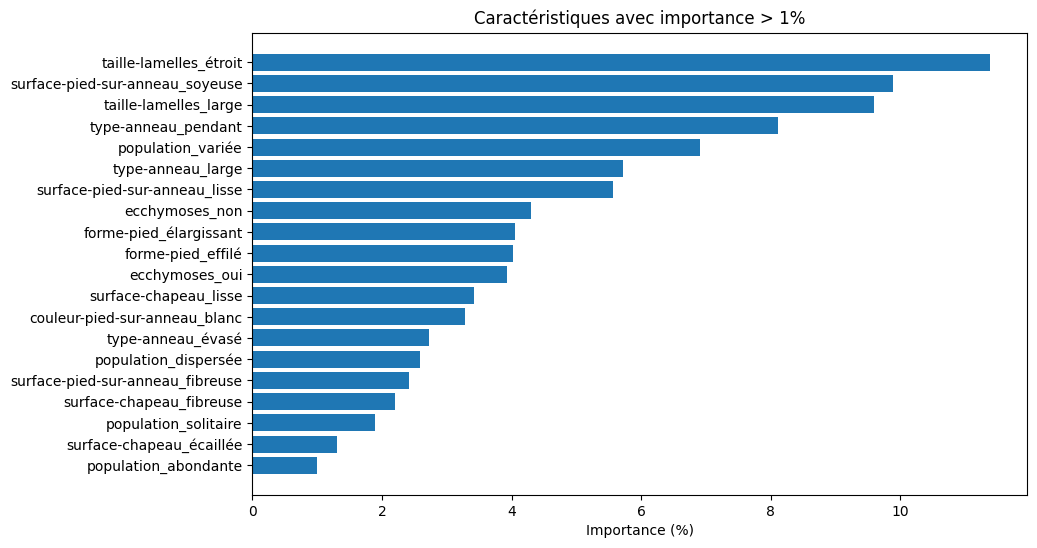

In [25]:
import pandas as pd

# Récupérer les importances des features
importances = best_rf.feature_importances_
feature_names = features.columns

# Créer un DataFrame trié par importance
feat_imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Filtrer celles supérieures à 1%
feat_imp_df = feat_imp_df[feat_imp_df["Importance"] > 0.01]

# Afficher le résultat
print("Caractéristiques avec importance > 1% :")
print(feat_imp_df)

# (Optionnel) Visualisation
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df["Feature"], feat_imp_df["Importance"]*100)
plt.xlabel("Importance (%)")
plt.title("Caractéristiques avec importance > 1%")
plt.gca().invert_yaxis()
plt.show()


## 5. Stacking

Essayer différents modèles d'estimateur final

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

# Définir les estimateurs de base
base_learners = [
    ("svc", make_pipeline(StandardScaler(), SVC(probability=True, random_state=42))),
    ("logreg", make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))),
    ("naive_bayes", GaussianNB()),
    ("perceptron", make_pipeline(StandardScaler(), Perceptron(max_iter=1000, random_state=42)))
]

# Choisir un estimateur final (ici une régression logistique)
final_estimator = LogisticRegression(max_iter=1000)

# Construire le stacking classifier
stack_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=final_estimator,
    cv=5,
    n_jobs=-1
)

# Entraîner le stacking
stack_clf.fit(X_train, y_train)

# Évaluer sur le jeu de dev
y_pred_stack = stack_clf.predict(X_dev)
acc = accuracy_score(y_dev, y_pred_stack)

print(f"Précision du modèle Stacking (avec LogisticRegression en estimateur final) : {acc*100:.2f}%")

Précision du modèle Stacking (avec LogisticRegression en estimateur final) : 99.02%


## 6. Gradient Boosting

6. Exécuter un apprentissage de Gradient Boosting avec et sans "Early Stopping" sur le nombre d'estimateurs. Comparer avec le résultat sur les données dev.

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# ---- 1. Gradient Boosting sans early stopping ----
gb_no_es = GradientBoostingClassifier(
    n_estimators=500,     # fixe à 500 arbres
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb_no_es.fit(X_train, y_train)
y_pred_no_es = gb_no_es.predict(X_dev)
acc_no_es = accuracy_score(y_dev, y_pred_no_es)

print(f"Précision SANS early stopping : {acc_no_es*100:.2f}%")


# ---- 2. Gradient Boosting avec early stopping ----
gb_es = GradientBoostingClassifier(
    n_estimators=5000,    # grand nombre d'arbres max
    learning_rate=0.1,
    max_depth=3,
    n_iter_no_change=10, # stop si pas d'amélioration après 10 itérations
    validation_fraction=0.1, # 10% des données d'entraînement pour valider
    random_state=42
)
gb_es.fit(X_train, y_train)
y_pred_es = gb_es.predict(X_dev)
acc_es = accuracy_score(y_dev, y_pred_es)

print(f"Précision AVEC early stopping : {acc_es*100:.2f}%")


Précision SANS early stopping : 99.18%
Précision AVEC early stopping : 99.18%


## 7. (Optionnel) Recommencer les exercices précédents en utilisant les "ordinal encoders". Que remarquez-vous ?